In [335]:
# library & dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# to ignore the warnings 
from warnings import filterwarnings
# Import label encoder 
from sklearn import preprocessing

#Load the Excel data into a DataFrame object
excel_data_df = pd.ExcelFile('V02Max_Combined.xlsx')
temp_data = pd.read_excel('merged_athletes_data.xlsx')

sheet_kayaking = pd.read_excel(excel_data_df, sheet_name = 'Kayaking')
sheet_Athletes = pd.read_excel(excel_data_df, sheet_name ='Athletes')
sheet_Triathlon = pd.read_excel(excel_data_df, sheet_name ='Triathlon')
sheet_Fencing = pd.read_excel(excel_data_df, sheet_name ='Fencing')



/Users/anitashaw/Documents/Python/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/anitashaw/Documents/Python/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/anitashaw/Documents/Python/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


42. What was the difference in heart rate between warm up and GET for athlete 1

43. Create a pivot table that shows count of patients within each age group and sport

In [174]:
# Create a pivot table Using Aggfunc 'count'
pivot_table = pd.pivot_table(sheet_Athletes, values='ID', index='sport', columns='age', aggfunc='count')
pivot_table.style.format({'ID':'{:.0f}'}) 
print(pivot_table)

age         12   13   14   15   16   17   18
sport                                       
fencing    NaN  NaN  2.0  4.0  2.0  2.0  NaN
kayak      NaN  2.0  NaN  NaN  1.0  NaN  3.0
triathlon  2.0  NaN  NaN  NaN  NaN  NaN  NaN


44. Display a  distrubution chart of MAX V02 for all athletes

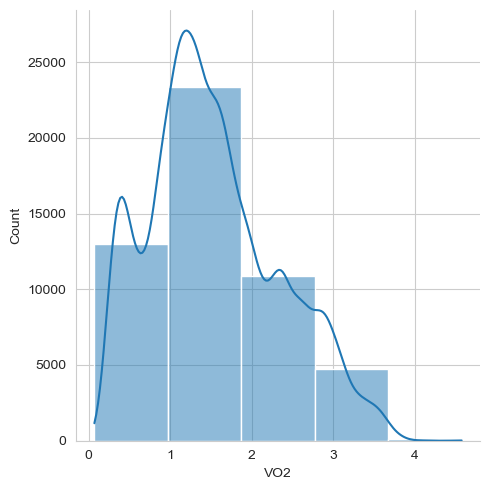

In [228]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.displot(temp_data['VO2'],kde=True,bins=5)


45. Create a dummy array with no data with a size of 15.

In [183]:
dumArr = np.array(16)
print("Dummy array with no data with size :",dumArr)

Dummy array with no data with size : 16


46. How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

47. Convert ' sport' into a numeric field through Label encoding

In [332]:
#sheet_Athletes['sport'].unique() 
print("original sport colum type ",sheet_Athletes['sport'].unique())
print("sport data \n",sheet_Athletes['sport'])
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'sport'. 
sheet_Athletes['sport']= label_encoder.fit_transform(sheet_Athletes['sport']) 
#sheet_Athletes['sport'].unique() 
print("after conversion to numeric",sheet_Athletes['sport'].unique())
print("sport data\n",sheet_Athletes['sport'])

original sport colum type  ['fencing' 'kayak' 'triathlon']
sport data 
 0       fencing
1       fencing
2       fencing
3       fencing
4       fencing
5       fencing
6       fencing
7       fencing
8       fencing
9       fencing
10        kayak
11        kayak
12        kayak
13        kayak
14        kayak
15        kayak
16    triathlon
17    triathlon
Name: sport, dtype: object
after convertion to numeric [0 1 2]
sport data
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    2
Name: sport, dtype: int64


48. What was the average age of the athletes?

In [341]:
print("average age of the athletes :",sheet_Athletes['age'].mean())

average age of the athletes : 15.222222222222221


49. Retrieve the row with minimum IBI for fencing athletes using sorting technique.

50(A). Create a violin chart using any 2 columns in the dataset(using Fencing dataset)

<Axes: xlabel='RR', ylabel='power'>

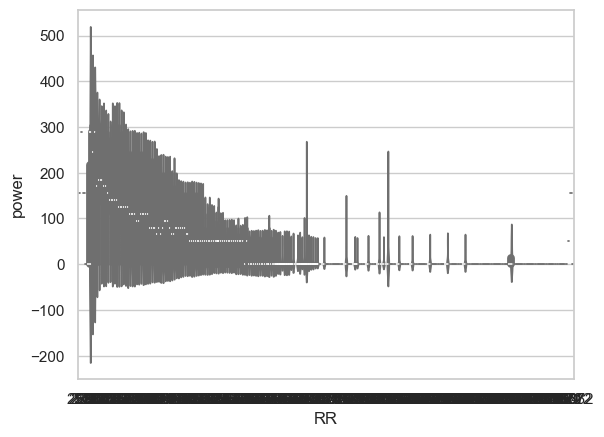

In [335]:
sns.set(style = 'whitegrid')
sns.violinplot(x= sheet_Fencing['RR'],y= sheet_Fencing['power'],palette="pastel")

In [ ]:
50(B). Create a violin chart using any 2 columns in the dataset ( random 50 rows)

<Axes: xlabel='RR', ylabel='power'>

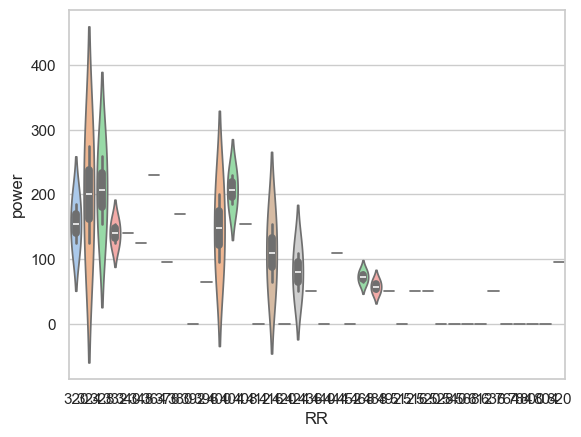

In [282]:
# Selecting 50 random rows and specific columns
random_rows= sheet_Fencing.sample(n=50).loc[:, ['RR', 'power']]
# use to set style of background of plot
sns.set(style = 'whitegrid')
sns.violinplot(x= random_rows['RR'],y= random_rows['power'],palette="pastel")


51(A). List every athlete’s V02 ml/kg - (The iterrows() function can be used to iterate over the DataFrame rows as (index, Series) pairs, which can then be used to create a list)

In [333]:
# Create an empty list
Row_list =[]

# Iterate over first 50 rows
for index, rows in temp_data.head(50).iterrows():
    # Create list for the current row
    my_list =[rows.VO2]
    
    # append the list to the final list
    Row_list.append(my_list)

# Print the list
print(Row_list)

[[0.302007609], [0.302007609], [0.301335742], [0.301335742], [0.301335742], [0.371173171], [0.371173171], [0.371173171], [0.410091179], [0.410091179], [0.410091179], [0.403671029], [0.403671029], [0.403671029], [0.405154495], [0.405154495], [0.405154495], [0.387334824], [0.387334824], [0.387334824], [0.367792864], [0.367792864], [0.367792864], [0.31583054], [0.31583054], [0.31583054], [0.310178484], [0.310178484], [0.310178484], [0.307939922], [0.307939922], [0.307939922], [0.31649763], [0.31649763], [0.31649763], [0.329339834], [0.329339834], [0.329339834], [0.333033454], [0.333033454], [0.333033454], [0.327401742], [0.327401742], [0.306693321], [0.306693321], [0.306693321], [0.290374669], [0.290374669], [0.290374669], [0.326006856]]


51(B). List every athlete’s V02 ml/kg - (In the below example, we use the values property to represent the DataFrame as a NumPy array and then convert it to a list using the tolist() function.)

In [331]:
list_of_50 = temp_data.iloc[:50] 
# Converting DataFrame to list using values property
list = list_of_50['VO2'].tolist()
print(list)


[0.302007609, 0.302007609, 0.301335742, 0.301335742, 0.301335742, 0.371173171, 0.371173171, 0.371173171, 0.410091179, 0.410091179, 0.410091179, 0.403671029, 0.403671029, 0.403671029, 0.405154495, 0.405154495, 0.405154495, 0.387334824, 0.387334824, 0.387334824, 0.367792864, 0.367792864, 0.367792864, 0.31583054, 0.31583054, 0.31583054, 0.310178484, 0.310178484, 0.310178484, 0.307939922, 0.307939922, 0.307939922, 0.31649763, 0.31649763, 0.31649763, 0.329339834, 0.329339834, 0.329339834, 0.333033454, 0.333033454, 0.333033454, 0.327401742, 0.327401742, 0.306693321, 0.306693321, 0.306693321, 0.290374669, 0.290374669, 0.290374669, 0.326006856]


56. Display a histogram to show distribution of athletes by sport.

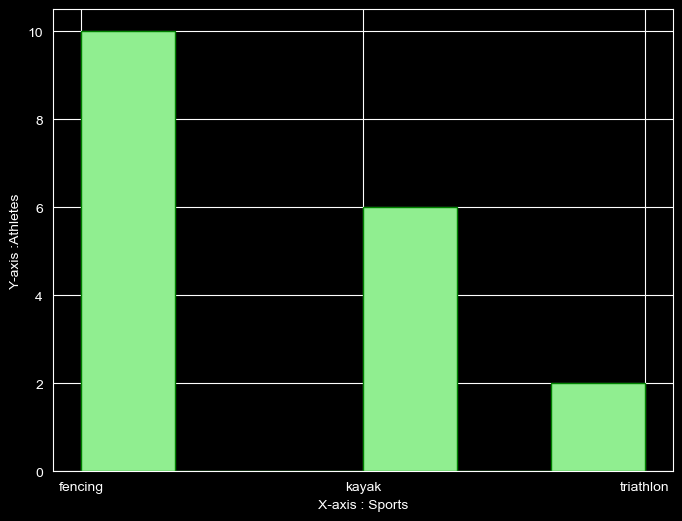

In [272]:
#Ids = sheet_Athletes['ID']
Sports = sheet_Athletes['sport']
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
#create histogram
plt.hist(Sports,"auto",color='lightgreen',edgecolor="g",align='mid')

# Add x-axis and y-axis titles
plt.xlabel('X-axis : Sports')
plt.ylabel('Y-axis :Athletes')
# Display the plot
plt.show()

57. get the first letter of last name of students using for loops and RegEX

In [549]:
list = sheet_Athletes.iloc[:] 
# Converting DataFrame to list using values property
last_name_list = list['Last Name'].tolist()

# Iterate over first 50 rows
for rows in last_name_list:
    #regex pattern used to extract last char of string.
   regex_result = re.search(r'^[A-za-z]{1}',rows)
   print("first letter ", regex_result ,"of athletes ", rows)

first letter  <re.Match object; span=(0, 1), match='M'> of athletes  Martinez
first letter  <re.Match object; span=(0, 1), match='R'> of athletes  Reynolds
first letter  <re.Match object; span=(0, 1), match='H'> of athletes  Harper
first letter  <re.Match object; span=(0, 1), match='S'> of athletes  Sanchez
first letter  <re.Match object; span=(0, 1), match='T'> of athletes  Thompson
first letter  <re.Match object; span=(0, 1), match='R'> of athletes  Rodriguez
first letter  <re.Match object; span=(0, 1), match='S'> of athletes  Simmons
first letter  <re.Match object; span=(0, 1), match='B'> of athletes  Bennett
first letter  <re.Match object; span=(0, 1), match='P'> of athletes  Price
first letter  <re.Match object; span=(0, 1), match='J'> of athletes  Jordan
first letter  <re.Match object; span=(0, 1), match='G'> of athletes  Griffin
first letter  <re.Match object; span=(0, 1), match='D'> of athletes  Dixon
first letter  <re.Match object; span=(0, 1), match='C'> of athletes  Carpente

In [ ]:
60.get the last letter of athletes last names using RegEX

In [545]:
list_of_50 = sheet_Athletes.iloc[:50] 
# Converting DataFrame to list using values property
list = list_of_50['Last Name'].tolist()

# Iterate over first 50 rows
for rows in list:
    #regex pattern used to extract last char of string.
   regex_result = re.search(r'[A-za-z]{1}\Z',rows)
   print("last letter ", regex_result ,"of athletes ", rows)

last letter  <re.Match object; span=(7, 8), match='z'> of athletes  Martinez
last letter  <re.Match object; span=(7, 8), match='s'> of athletes  Reynolds
last letter  <re.Match object; span=(5, 6), match='r'> of athletes  Harper
last letter  <re.Match object; span=(6, 7), match='z'> of athletes  Sanchez
last letter  <re.Match object; span=(7, 8), match='n'> of athletes  Thompson
last letter  <re.Match object; span=(8, 9), match='z'> of athletes  Rodriguez
last letter  <re.Match object; span=(6, 7), match='s'> of athletes  Simmons
last letter  <re.Match object; span=(6, 7), match='t'> of athletes  Bennett
last letter  <re.Match object; span=(4, 5), match='e'> of athletes  Price
last letter  <re.Match object; span=(5, 6), match='n'> of athletes  Jordan
last letter  <re.Match object; span=(6, 7), match='n'> of athletes  Griffin
last letter  <re.Match object; span=(4, 5), match='n'> of athletes  Dixon
last letter  <re.Match object; span=(8, 9), match='r'> of athletes  Carpenter
last letter